In [1]:
from autograd.tensor import Tensor as tn
from autograd.dropout import *
from autograd.parameter import Parameter as pr
from autograd.flatten import Flatten as fl
from autograd.module import Module
from autograd.nn import Sequential
from autograd.linear import Linear
from autograd.act import Relu, Sigmoid 
from autograd.loss import CEL
from autograd.optim import GD
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from Dataset1 import catnoncat
#from Dataset1.reg import load_2D_dataset

In [3]:
train_x = catnoncat.train_x() 
test_x = catnoncat.test_img() 

In [4]:
#mean_image = np.mean(train_x, axis=0)
#train_x -= mean_image
#X_val -= mean_image
#test_x -= mean_image


In [5]:
train_x = fl().forward(train_x)
test_x = fl().forward(test_x)

data shape: (12288, 209)
data shape: (12288, 50)


In [6]:
train_y = tn(catnoncat.train_y())
test_y = tn(catnoncat.test_y())

In [7]:
mod2 = Sequential([
         Linear(50,12288),
            Relu(),
        #Dropout(.9),
         Linear(20,50),
            Relu(),
        #Dropout(.9),
         Linear(10,20),
            Relu(),
        #Dropout(.9),
         Linear(1,10),
            Sigmoid()])

In [8]:
#Linear.lambda_ = .001

0 0.7544704264136884
100 0.6201308949595775
200 0.5949954850155488
300 0.571921427574754
400 0.5416761863423287
500 0.5072111683210221
600 0.4784757915631249
700 0.45249207736388475
800 0.42831046750327045
900 0.4040883885058103
1000 0.3826398264051083
1100 0.3625610167704546
1200 0.34299678361808905
1300 0.32445177949406706
1400 0.3074343777358066
1500 0.29223093929905614
1600 0.2780511075571607
1700 0.2641093243029056
1800 0.2512164180360523
1900 0.2393650559671307
2000 0.22840824889835898
2100 0.2182229741499287
2200 0.2085135471655123
2300 0.19935781909925773
2400 0.1907856921696656
2500 0.18265773911340513
2600 0.17493933292001865
2700 0.16776778805739545
2800 0.1610637784333223
2900 0.15467920929814544
3000 0.14849912507616542
3100 0.14278260079625396
3200 0.1374125358197277
3300 0.132179056593488
3400 0.1272702226119123
3500 0.12245793149334033
3600 0.11774594201357694
3700 0.1133132580070888
3800 0.10912834689956546
3900 0.10516317142209564
4000 0.10141267840750524
4100 0.09787

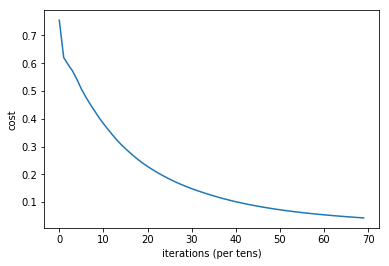

In [9]:
optimizer = GD(lr=.075)


costs = []

for epoch in range(7000):

    epoch_loss = 0.0

    for l in mod2.layers:
        l.zero_grad()

    out = mod2.forward(train_x)
    cout = CEL(out,train_y)
    loss = cout.sum()

    loss.backward()
    epoch_loss += loss.data

    for l in mod2.layers:
        optimizer.step(l)


    if epoch % 100 == 0:
        print(epoch, epoch_loss)
    if epoch % 100 == 0:
        costs.append(epoch_loss)


# plot the cost
plt.plot(np.squeeze(costs))
plt.ylabel('cost')
plt.xlabel('iterations (per tens)')
plt.show()

In [10]:
mod2.predict(test_x,test_y)

Accuracy: 0.76


In [11]:
l1 = mod2.layers[0]
mod2.layers

In [12]:
re_l = fl().forward(l1.w.data)
#rel = re_l[:-1,:]

data shape: (12288, 50)


In [13]:
full = re_l.data.reshape(50,64,64,3)
full.shape

(50, 64, 64, 3)

In [14]:
train_x = catnoncat.train_x() 
train_x[1:2].shape

(1, 64, 64, 3)

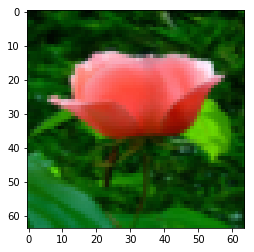

In [15]:
plt.figure()
plt.imshow(np.squeeze(train_x[3:4])) 
plt.show()

(1, 64, 64, 3)


(-0.5, 63.5, 63.5, -0.5)

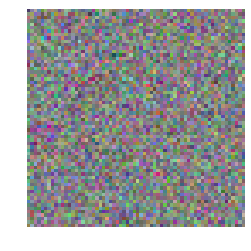

In [26]:
w = full[:1]
print(w.shape)
w_min, w_max = np.min(w), np.max(w)
#for i in range(10):
#plt.subplot(2, 5, i + 1)
wimg = 255.0 * (w.squeeze() - w_min) / (w_max - w_min)
plt.imshow(wimg.astype('uint8'))
plt.axis('off')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


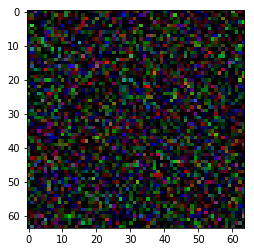

In [89]:
plt.figure()
plt.imshow(np.squeeze(full)*255.0)
plt.show()

In [84]:
from cs231n.data_utils import load_CIFAR10


ModuleNotFoundError: No module named 'cs231n'

In [31]:
np.log(10)

2.302585092994046

In [26]:
np.sum(loss.data)

0.7544704264136884

In [2]:
import torch
from torch import nn
m = nn.Sigmoid()
loss = nn.BCELoss()
input1 = torch.randn(3, requires_grad=True)
input = input1.reshape(1,3)

target = torch.empty(3).random_(2)
target = target.reshape(1,3)

output = loss(m(input), target)
output.backward()

In [3]:
output

tensor(0.9779, grad_fn=<BinaryCrossEntropyBackward>)

In [6]:
input

tensor([[-1.6288, -0.0725, -0.5161]], grad_fn=<AsStridedBackward>)

In [7]:
target

tensor([[1., 0., 0.]])

In [8]:
input1.grad

tensor([-0.2787,  0.1606,  0.1246])

In [9]:
inp = tn(np.array([-1.6288, -0.0725, -0.5161]).reshape(1,3),True)
inp

Tensor([[-1.6288 -0.0725 -0.5161]], requires_grad=True)

In [10]:
tg = tn(np.array([1., 0., 0.]).reshape(1,3))
tg

Tensor([[1. 0. 0.]], requires_grad=False)

In [11]:
inp1 = Sigmoid().forward(inp)
inp1.sum()

Tensor(1.0196423858768962, requires_grad=True)

In [12]:
ou = CEL(inp1,tg)
ou

Tensor([0.60264015 0.21918469 0.15600967], requires_grad=True)

In [13]:
o = ou.sum()
o.backward()
o

Tensor(0.9778345097027215, requires_grad=True)

In [15]:

inp.grad 

Tensor([[-0.27866839  0.16062764  0.12458821]], requires_grad=False)

In [23]:
np.log(10)

2.302585092994046

In [25]:
help(output.grad_fn)

Help on BinaryCrossEntropyBackward object:

class BinaryCrossEntropyBackward(object)
 |  Methods defined here:
 |  
 |  __call__(self, /, *args, **kwargs)
 |      Call self as a function.
 |  
 |  name(...)
 |  
 |  register_hook(...)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  metadata
 |  
 |  next_functions
 |  
 |  requires_grad

